In [80]:
import pandas as pd
import matplotlib.pyplot as plt


In [81]:
df = pd.read_csv("date_inghetata.csv")
df

,temperatura,vanzari,luna,zi_saptamana
0,8,25,ianuarie,luni
1,10,35,ianuarie,marti
2,12,45,ianuarie,miercuri
3,15,55,ianuarie,joi
4,18,75,ianuarie,vineri
...,...,...,...,...
233,33,168,mai,miercuri
234,35,182,mai,joi
235,37,195,mai,vineri
236,39,208,mai,sambata


In [82]:
x = df["temperatura"]

In [83]:
type(x)

pandas.core.series.Series

In [84]:
y = df["vanzari"]


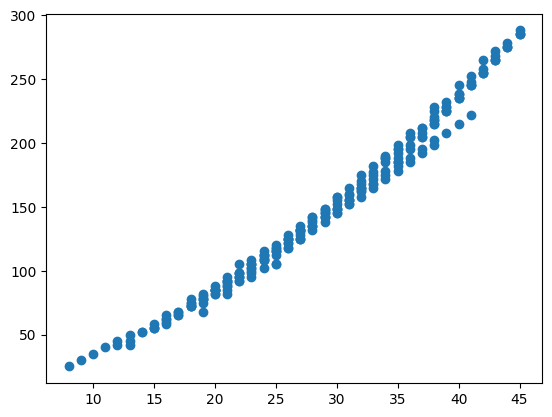

In [85]:
plt.scatter(x, y);

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22)

In [88]:
for i in  x_train, x_test, y_train, y_test:
    print(len(i), end=",")

185,53,185,53,

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [91]:
import numpy as np

In [92]:
x_train = np.array(x_train).reshape(-1, 1)

In [93]:
x_test= np.array(x_test).reshape(-1, 1)

In [94]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prima varianta -  de scor ~ 98

In [95]:
model.score(x_test, y_test)

0.9810458845556297

# Scalarea datelor

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [97]:
scaler = StandardScaler()
scaler

,copy,True
,with_mean,True
,with_std,True


In [100]:
colectie = [[5], [15], [25], [35]]

In [102]:
scaler.fit_transform(colectie)

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [107]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform([[5], [105], [25], [36]])

array([[0.  ],
       [1.  ],
       [0.2 ],
       [0.31]])

In [106]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform([[22], [17], [44], [121]])

array([[0.04807692],
       [0.        ],
       [0.25961538],
       [1.        ]])

# Reantrenare cu date scalate

In [109]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [110]:
standard_scaler = StandardScaler()
standard_scaler

,copy,True
,with_mean,True
,with_std,True


In [112]:
x_train_scaled = standard_scaler.fit_transform(x_train)

In [ ]:
model.fit()

In [113]:
x_train.min(), x_train.max()

(np.int64(8), np.int64(45))

In [116]:
pipeline = Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())])
pipeline

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [117]:
pipeline.fit(x_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [118]:
pipeline.predict([[46]])

array([273.64982777])

In [119]:
pipeline.score(x_test, y_test)

0.9810458845556297

# Pipeline cu KNN

In [120]:
from sklearn.neighbors import KNeighborsRegressor

In [121]:
knn_pipeline = Pipeline([("scaler", StandardScaler()),("model", KNeighborsRegressor()) ])
knn_pipeline

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [122]:
knn_pipeline.fit(x_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [123]:
knn_pipeline.score(x_test, y_test)

0.9910245022852927

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
random_forest_pipeline = Pipeline([("scaler", StandardScaler()),("model", RandomForestRegressor()) ])
random_forest_pipeline

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [126]:
random_forest_pipeline.fit(x_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [127]:
random_forest_pipeline.score(x_test, y_test)

0.9919550053549335

In [129]:
random_forest_pipeline

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
